In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [4]:
from google.colab import files
files.upload()

Saving lyrics.txt to lyrics.txt


{'lyrics.txt': b'Too late for the other side  \nCaught in a chase  \nTwenty five to life  \nToo late for the other side  \nCaught in a chase  \nTwenty five to life  \nYeah  \nToo late  \nI cant keep chasing \'em  \nI\'m taking my life back  \nCaught in a change  \nTwenty five to life  \n  \nI don\'t think she understands the sacrifices that I\'ve made  \nMaybe if this bitch had acted right I would\'ve stayed  \nBut I\'ve already wasted over half of my life I would\'ve laid  \nDown and died for you I no longer cried for you  \nNo more pain bitch you  \nTook me for granted took my heart and ran it straight into the planet  \nInto the dirt I can no longer stand it  \nNow my respect I demand it  \nI\'m a take control of this relationship  \nCommand it, and I\'m a be the boss of you now goddammit  \nAnd what I mean is that I will no longer let you control me  \nSo you better hear me out this much you owe me  \nI gave up my life for you, totally devoted to you while I\'ve stayed  \nFaithful 

In [0]:
tokenizer = Tokenizer()
data = open('lyrics.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [6]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


W0717 16:10:40.074538 140278307010432 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0717 16:10:40.105925 140278307010432 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0717 16:10:40.112990 140278307010432 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 17, 100)           534000    
_________________________________________________________________
bidirectional (Bidirectional (None, 17, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 17, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 2670)              269670    
_________________________________________________________________
dense_1 (Dense)              (None, 5340)              14263140  
Total params: 15,528,410
Trainable params: 15,528,410
Non-trainable params: 0
____________________________________________

In [0]:
 history = model.fit(predictors, label, epochs=110, verbose=1)

W0717 16:10:49.955939 140278307010432 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/110
31783/31783 [==============================] - 89s 3ms/sample - loss: 6.8194 - acc: 0.0356
Epoch 2/110
12544/31783 [==========>...................] - ETA: 53s - loss: 6.4291 - acc: 0.0383

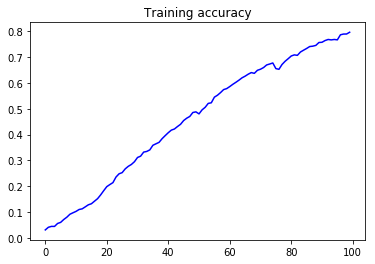

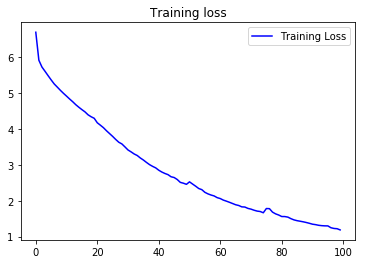

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [0]:
seed_text = "slim shady"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

slim shady your ass forgot so just in case you don't remember me with starter jackets for your beats in you what he don't be early to be stare and gazing with sorrow jackets now shit they swallowed shit in what motherfucking last unit raps cold unit time to wouldn't started shit with nothing some shit with nothing my sentence for thought unit time for my last last this a lyric clothes he cowers be this trouble trouble lyrics bites like he don't get up so we move through with ho we man up on her nigga first was not his last
